# k-NN, n_neighbors = 15

In [ ]:
import numpy as np
import pandas as pd
from math import ceil
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score,recall_score,f1_score, accuracy_score,confusion_matrix,classification_report

In [ ]:
X_train_df = pd.read_csv("X_train.csv")
y_train_df = pd.read_csv("y_train.csv")
X_test_df = pd.read_csv("X_test.csv")
y_test_df = pd.read_csv("y_test.csv")

X_train = X_train_df.values
X_test = X_test_df.values
y_train = y_train_df["Severity"]
y_test = y_test_df["Severity"]

In [ ]:
# Initialize the Logistic Regression model with adjusted hyperparameters
kn_classifier = KNeighborsClassifier(n_neighbors=15, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')

# Train the model on the scaled training data
kn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [ ]:
def classification_task( model,X_train_scaled, y_train ,X_test_scaled ,y_test, predic,model_name):

    perf_df=pd.DataFrame({'Train_Score':model.score(X_train_scaled,y_train),"Test_Score":model.score(X_test_scaled,y_test),
                       "Precision_Score":precision_score(y_test,predic,average='weighted'),"Recall_Score":recall_score(y_test,predic,average='weighted'),
                       "F1_Score":f1_score(y_test,predic,average='weighted') , "accuracy":accuracy_score(y_test,predic)}, index=[model_name])
    return perf_df

In [ ]:
y_pred = kn_classifier.predict(X_test)

Eval_kn_classifier =classification_task(kn_classifier, X_train, y_train ,X_test, y_test, y_pred,'KNN')
Eval_kn_classifier

,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
KNN,0.838482,0.821189,0.808515,0.821189,0.786348,0.821189


Accuracy: 0.82


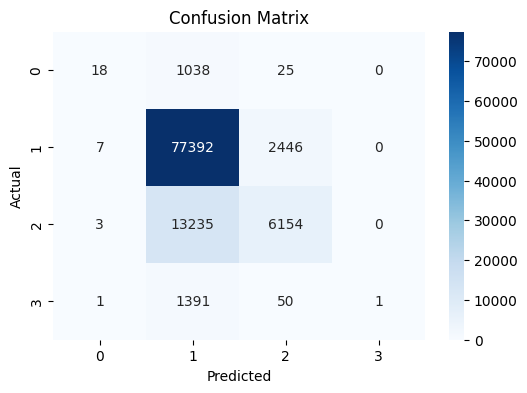

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.02      0.03      1081
           1       0.83      0.97      0.90     79845
           2       0.71      0.32      0.44     19392
           3       1.00      0.00      0.00      1443

    accuracy                           0.82    101761
   macro avg       0.79      0.33      0.34    101761
weighted avg       0.81      0.82      0.79    101761



In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_test, y_pred, zero_division=0)
print("Classification Report:")
print(class_report)